<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/5%EC%9D%BC%EC%B0%A8/%EC%88%9C%EC%A7%84%ED%95%9C%EB%B2%A0%EC%9D%B4%EC%A6%88%EB%B6%84%EB%A5%98%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Start**

In [1]:
# prompt: https://en.wikipedia.org/wiki/Naive_Bayes_classifier 라는 url주소에서 <table class="wikitable">의 내용을 데이터프레임으로 변경하려면

import pandas as pd
from io import StringIO
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Naive_Bayes_classifier"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all('table', class_="wikitable")[0]

data = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 0:
        data.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(data)

df


,0,1,2,3
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [2]:
# prompt: 컬럼명을 ' gender', 'height, 'weight', 'foot_size'로 변경해줘

df.columns = ['gender', 'height', 'weight', 'foot_size']
df

,gender,height,weight,foot_size
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [3]:
# prompt: height 컬럼의 값을 수자만 남기고 괄호안의 내용은 제거해줘

df['height'] = df['height'].str.replace(r'\D', '')
df


,gender,height,weight,foot_size
0,male,6,180,12
1,male,"5.92 (5'11"")",190,11
2,male,"5.58 (5'7"")",170,12
3,male,"5.92 (5'11"")",165,10
4,female,5,100,6
5,female,"5.5 (5'6"")",150,8
6,female,"5.42 (5'5"")",130,7
7,female,"5.75 (5'9"")",150,9


In [4]:
## chatgpt
import re
df['height'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))

,height
0,6.00
1,5.92
2,5.58
3,5.92
4,5.00
5,5.50
6,5.42
7,5.75


In [5]:
# 키 열에서 숫자 부분만 추출하여 실수형으로 변환
df['height'] = df['height'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))
df

,gender,height,weight,foot_size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     8 non-null      object 
 1   height     8 non-null      float64
 2   weight     8 non-null      object 
 3   foot_size  8 non-null      object 
dtypes: float64(1), object(3)
memory usage: 388.0+ bytes


In [7]:
df.describe(include='all')

,gender,height,weight,foot_size
count,8,8.000000,8,8
unique,2,NaN,7,7
top,male,NaN,150,12
freq,4,NaN,2,2
mean,NaN,5.636250,NaN,NaN
std,NaN,0.333721,NaN,NaN
min,NaN,5.000000,NaN,NaN
25%,NaN,5.480000,NaN,NaN
50%,NaN,5.665000,NaN,NaN
75%,NaN,5.920000,NaN,NaN


In [8]:
# prompt: weight와 foot_size를 정수로 변경

df['weight'] = df['weight'].astype(int)
df['foot_size'] = df['foot_size'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     8 non-null      object 
 1   height     8 non-null      float64
 2   weight     8 non-null      int64  
 3   foot_size  8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [9]:
df

,gender,height,weight,foot_size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


<Axes: xlabel='height', ylabel='Count'>

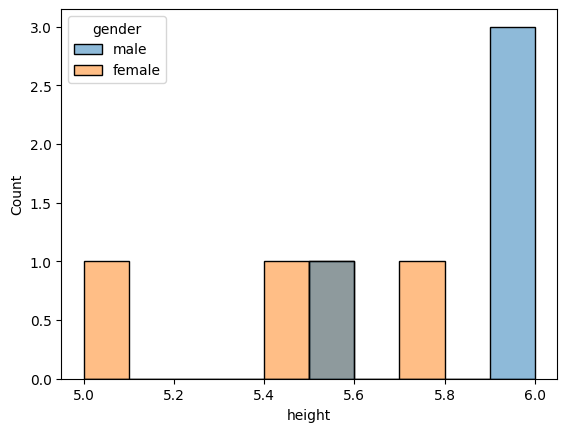

In [10]:
# prompt: gender을 hue로하여 'height컬럼의 histogram을 seaborn으로 시각화

import seaborn as sns

sns.histplot(data=df, x="height", hue="gender", bins=10)


<Axes: xlabel='height', ylabel='Density'>

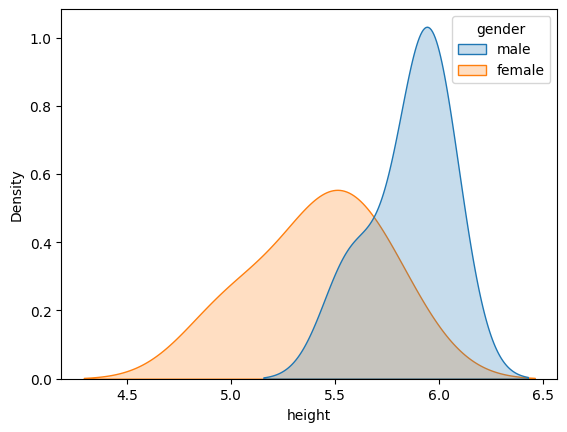

In [11]:
# prompt: 성별을 hue로하여 '키'컬럼의 histogram을 seaborn sns.kdeplot으로 시각화

sns.kdeplot(data=df, x="height", hue="gender", fill=True)


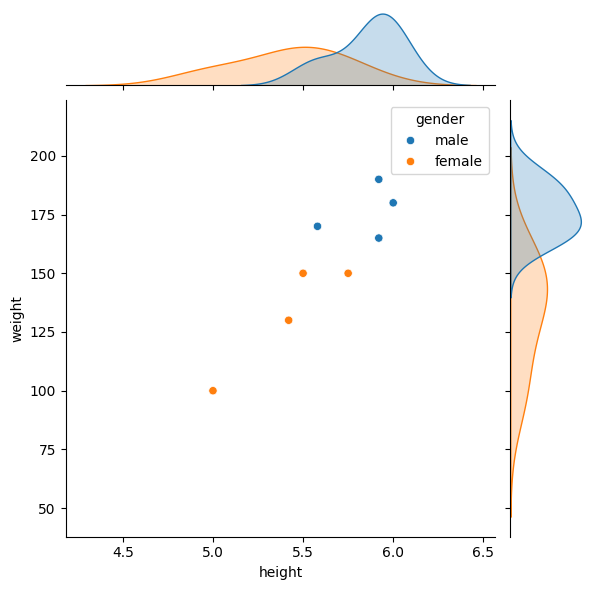

In [12]:
# prompt: gender을 hue로하여 'height', 'weight'컬럼으로 jointplot을 seaborn으로 시각화

import seaborn as sns

sns.jointplot(data=df, x="height", y="weight", hue="gender")


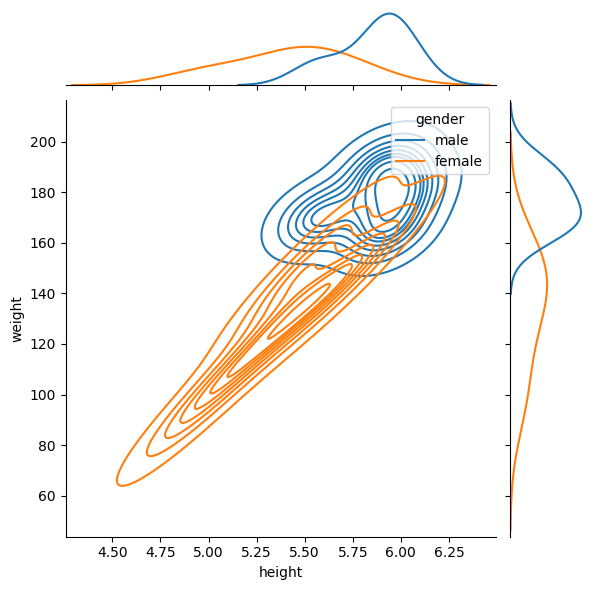

In [13]:
sns.jointplot(data=df, x="height", y="weight", hue="gender", kind="kde")

# **<font color='red'> 퀴즈2. 키가 6 feet이고 몸무게가 130인 사람의 성별은?**

### **키라는 변수를 기준으로 판단하였을 때, 키와 몸무게를 동시에 기준으로 판단했을떄 분류기준이 달라지는가?**

## **Generative AI?**
#### 8개의 데이터와 유사하게 가상의 데이터를 생성해서 시각화해보자

In [14]:
import pandas as pd
import numpy as np

# 주어진 데이터를 바탕으로 데이터프레임 생성
data = {
    "gender": ["male", "male", "male", "male", "female", "female", "female", "female"],
    "height": [6.00, 5.92, 5.58, 5.92, 5.00, 5.50, 5.42, 5.75],
    "weight": [180, 190, 170, 165, 100, 150, 130, 150],
    "foot_size": [12, 11, 12, 10, 6, 8, 7, 9]
}

# 데이터프레임으로 변환
df = pd.DataFrame(data)

# 남성과 여성의 평균과 표준편차 계산
mean_height_male = df[df['gender'] == 'male']['height'].mean()
std_height_male = df[df['gender'] == 'male']['height'].std()
mean_weight_male = df[df['gender'] == 'male']['weight'].mean()
std_weight_male = df[df['gender'] == 'male']['weight'].std()
mean_foot_size_male = df[df['gender'] == 'male']['foot_size'].mean()
std_foot_size_male = df[df['gender'] == 'male']['foot_size'].std()

mean_height_female = df[df['gender'] == 'female']['height'].mean()
std_height_female = df[df['gender'] == 'female']['height'].std()
mean_weight_female = df[df['gender'] == 'female']['weight'].mean()
std_weight_female = df[df['gender'] == 'female']['weight'].std()
mean_foot_size_female = df[df['gender'] == 'female']['foot_size'].mean()
std_foot_size_female = df[df['gender'] == 'female']['foot_size'].std()

# 가상의 데이터 100개 생성
np.random.seed(42)  # 재현성을 위해 랜덤 시드 고정

sample_size = 50

# 성별을 50:50 비율로 무작위 생성
gender = np.random.choice(['male', 'female'], sample_size)

# 키, 몸무게, 발크기를 남성과 여성의 평균 및 표준편차 기반으로 무작위 생성
height = np.where(gender == 'male', np.random.normal(mean_height_male, std_height_male, sample_size),
                  np.random.normal(mean_height_female, std_height_female, sample_size))
weight = np.where(gender == 'male', np.random.normal(mean_weight_male, std_weight_male, sample_size),
                  np.random.normal(mean_weight_female, std_weight_female, sample_size))
foot_size = np.where(gender == 'male', np.random.normal(mean_foot_size_male, std_foot_size_male, sample_size),
                     np.random.normal(mean_foot_size_female, std_foot_size_female, sample_size))

# 데이터프레임 생성
df_generative = pd.DataFrame({
    'gender': gender,
    'height': height,
    'weight': weight,
    'foot_size': foot_size
})

df_generative.head()


,gender,height,weight,foot_size
0,male,5.737180,184.756850,10.146503
1,female,5.130514,154.723989,6.898829
2,male,6.334064,167.654020,11.407997
3,male,5.928789,184.821642,10.430510
4,male,5.877876,167.360312,11.212051


<Axes: xlabel='height', ylabel='Density'>

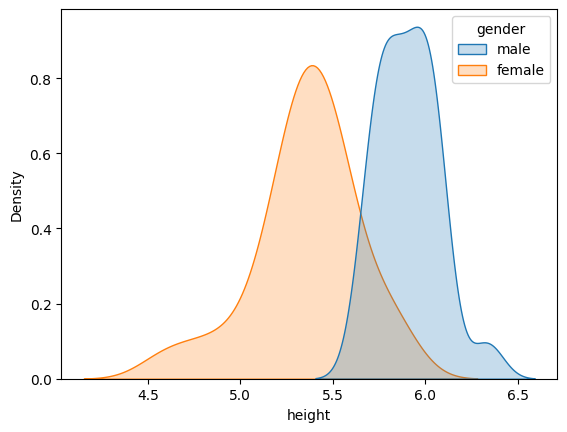

In [15]:
sns.kdeplot(data=df_generative, x="height", hue="gender", fill=True)

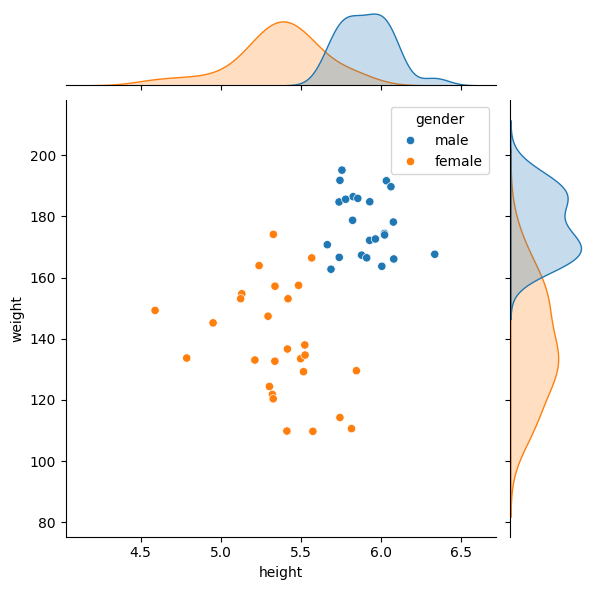

In [16]:
sns.jointplot(data=df_generative, x="height", y="weight", hue="gender")

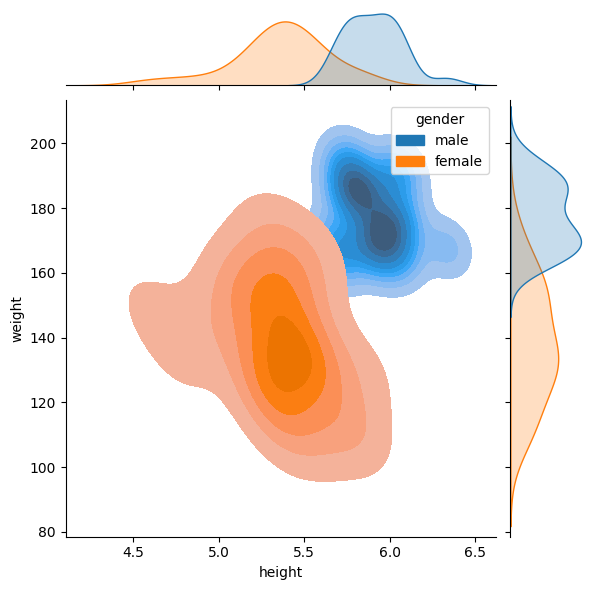

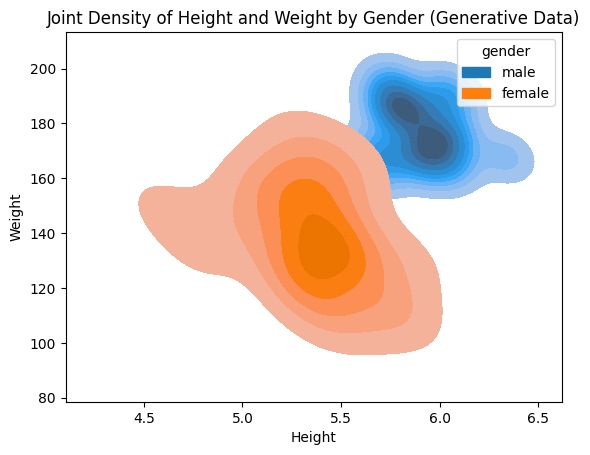

In [17]:
# prompt: sns.jointplot(data=df_generative, x="height", y="weight", hue="gender") 대신에 등고선으로 그려줘

import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot with bivariate and marginal histograms
sns.jointplot(data=df_generative, x="height", y="weight", hue="gender", kind="kde", fill=True)

# Convert the jointplot to a figure and axes object
fig, ax = plt.subplots()

# Plot the joint density as a contour plot
sns.kdeplot(data=df_generative, x="height", y="weight", hue="gender", fill=True, ax=ax)

# Add labels and title
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_title("Joint Density of Height and Weight by Gender (Generative Data)")

# Show the plot
plt.show()


## **TP, TN, FP, FN**

<img src='https://upload.wikimedia.org/wikipedia/commons/1/17/PPV%2C_NPV%2C_Sensitivity_and_Specificity.svg'>